10345 2640


<Figure size 640x480 with 0 Axes>

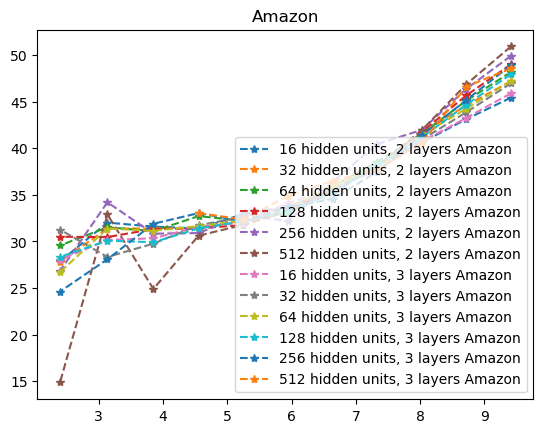

<Figure size 640x480 with 0 Axes>

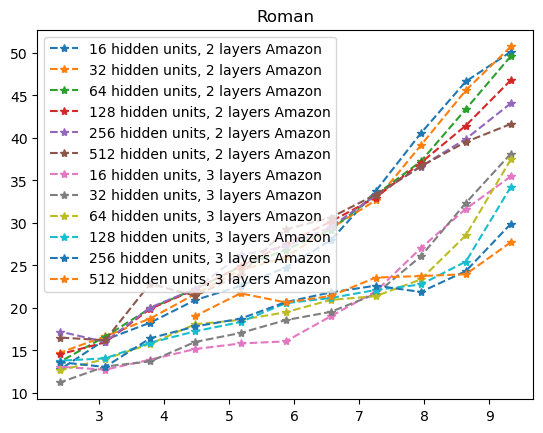

<Figure size 640x480 with 0 Axes>

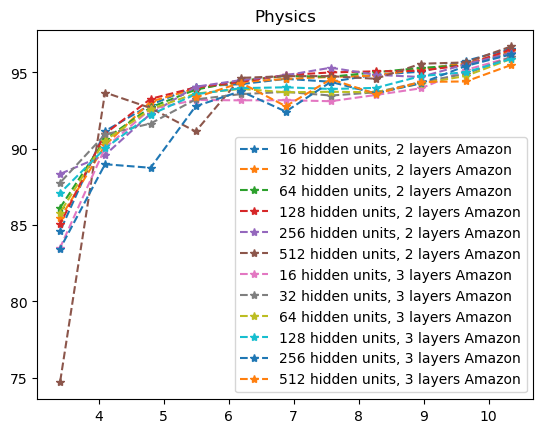

<Figure size 640x480 with 0 Axes>

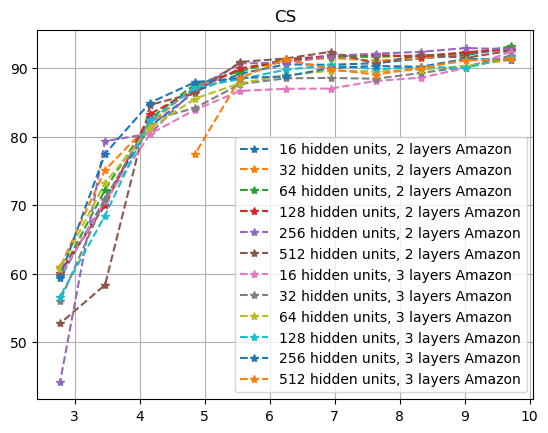

In [1]:
import numpy as np
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import csv
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

seeds = [i+1 for i in range(10)]
hiddens = [64,128,256]
layers = [1,2,3,4]
partitions = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
# convs = ['SAGE', 'GCN']
# datasets = ['PubMed']
datasets = ['Amazon', 'Roman', 'Physics', 'CS']
# datasets = ['Amazon', 'Roman']

# hiddens = [16,32,64]
# layers = [2,3,4]
hiddens = [16,32,64,128,256,512]
layers = [2,3]
partitions = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

def get_mean_std(df, partition, hidden, layer, col, dataset):
    condition = (df['partitions'] == partition) & (df['hiddens'] == hidden) & (df['layers'] == layer) & (df['dataset'] == dataset)
    filtered_df = df[condition]
    # print(filtered_df, len(filtered_df))
    if col == 'Difference Accuracy':
        filtered_df[col] = 100*(filtered_df['Test Accuracy'] - filtered_df['Train Accuracy'])
        return [filtered_df[col].mean(), filtered_df[col].std()]
    if col == 'Difference Loss':
        filtered_df[col] = filtered_df['Test Loss'] - filtered_df['Train Loss']
        return [filtered_df[col].mean(), filtered_df[col].std()]
    if col in ['Train Accuracy', 'Test Accuracy']:
        filtered_df[col] = 100*filtered_df[col]
        return [filtered_df[col].mean(), filtered_df[col].std()]
    if col == 'Difference Accuracy Abs':
        filtered_df[col] = np.abs(100*filtered_df['Test Accuracy'] - 100*filtered_df['Train Accuracy'])
        return [filtered_df[col].mean(), filtered_df[col].std()]
    if col == 'Difference Loss Abs':
        filtered_df[col] = np.abs(filtered_df['Test Loss'] - filtered_df['Train Loss'])
        return [filtered_df[col].mean(), filtered_df[col].std()]
    return [filtered_df[col].mean(), filtered_df[col].std()]


df = pd.read_csv('data_torch_Coauthor_HeterophilousGraphDataset.csv', delimiter=',')

print(len(df), len(hiddens)*len(layers)*len(partitions)*10*2)

cols = ['Test Loss', 'Train Loss', 'Test Accuracy', 'Train Accuracy', 'Difference Accuracy', 'Difference Loss']


# fig, ax = plt.subplots()
legend = []
for dataset in datasets:
    plt.figure()
    fig, ax = plt.subplots()
    for layer in layers:
        for hidden in hiddens:
            nodes = np.array([])

            means = {key: [] for key in cols}
            stds  = {key: [] for key in cols}
            for partition in partitions:
                    condition = (df['partitions'] == partition) & (df['hiddens'] == hidden) & (df['layers'] == layer) & (df['dataset'] == dataset)
                    filtered_df = df[condition]
                    nodes = np.append(nodes, filtered_df['nodes'])
                    
                    for col in cols:
                        
                        means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[0]]
                        stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[1]]
                        
            # vals = np.array(means['Train Loss'])-np.array(means['Test Loss'])
            # vals = np.array(means['Train Accuracy'])-np.array(means['Test Accuracy'])
            vals = np.array(means['Test Accuracy'])
            # print(len(vals), len(nodes), dataset, nodes)
            nodes = np.unique(nodes)
            ax.errorbar(np.log(nodes[::-1]),  vals[:nodes.shape[0]],  fmt= '--*')
            # ax.errorbar(nodes,  np.array(means['Train Loss'])-np.array(means['Test Loss']), yerr=stds[col], fmt= '--*')
            legend = legend + [f'{hidden} hidden units, {layer} layers {dataset}']
            ax.legend(legend)

            ax.title.set_text( f'{dataset}')


# ax.legend(legend)
plt.grid(True)
# plt.xscale('log')  # Set x-axis to logarithmic scale

# plt.yscale('log')
# plt.ylabel('Accuracy')
plt.show()


In [2]:
# # Plot 1 and 2
# cols = ['Test Loss', 'Train Loss', 'Test Accuracy', 'Train Accuracy','Difference Accuracy', 'Difference Loss']
# unique_values = df['nodes'].unique()
# nodes = unique_values[::-1]
# # fig, ax = plt.subplots()
# legend = []

# hiddens = [32,64,128,256]
# layers = [2,3]

# prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color']
# print(len(colors))

# partitions = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

              


# for dataset in datasets:
#     color_count = 0
#     fig, ax = plt.subplots()

#     for layer in layers:
#         for hidden in hiddens:
#             nodes = np.array([])

#             means = {key: [] for key in cols}
#             stds  = {key: [] for key in cols}               

#             for partition in partitions:
#                 for col in cols:
#                     condition = (df['partitions'] == partition) & (df['hiddens'] == hidden) & (df['layers'] == layer) & (df['dataset'] == dataset)
#                     filtered_df = df[condition]
#                     nodes = np.append(nodes, filtered_df['nodes'])
                    
#                     means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[0]]
#                     stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[1]]
#             # print(color_count)
#             nodes = np.unique(nodes)
#             # print(nodes, np.array(means['Difference Accuracy']))
#             ax.errorbar(nodes[::-1],  np.log(np.abs(np.array(means['Difference Accuracy']))), yerr=stds['Difference Accuracy'], fmt= '--*', color=colors[color_count])
#             color_count = color_count + 1
#             legend = legend + [f'{hidden} hidden units, {layer} layers']
#     ax.legend(legend, fontsize='xx-small') 
#     plt.grid(True)

#     plt.xscale('log')  # Set x-axis to logarithmic scale
#     plt.xlabel('Nodes')
#     plt.ylabel('Logarithm of the Accuracy Difference')
#     # plt.title(f'{dataset}')

#     plt.savefig(f'acc_diff_{dataset}.pdf')
#     plt.figure()

# legend = []
# color_count = 0
# for dataset in datasets:
#     color_count = 0
#     fig, ax = plt.subplots()

#     for layer in layers:
#         for hidden in hiddens:
#             nodes = np.array([])

#             means = {key: [] for key in cols}
#             stds  = {key: [] for key in cols}
#             for partition in partitions:
#                 for col in cols:
#                     condition = (df['partitions'] == partition) & (df['hiddens'] == hidden) & (df['layers'] == layer) & (df['dataset'] == dataset)
#                     filtered_df = df[condition]
#                     nodes = np.append(nodes, filtered_df['nodes'])

#                     means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[0]]
#                     stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[1]]
#             nodes = np.unique(nodes)

#             ax.errorbar(nodes[::-1],  np.log(means['Difference Loss']), yerr=stds['Difference Loss'], fmt= '--*', color=colors[color_count])

#             color_count = color_count + 1
#             legend = legend + [f'{hidden} hidden units, {layer} layers']
#     ax.legend(legend, fontsize='xx-small') 
#     plt.grid(True)
#     plt.xscale('log')  # Set x-axis to logarithmic scale
#     plt.xlabel('Nodes')
#     plt.ylabel('Logarithm of the Loss Difference')
#     # plt.title(f'{dataset}')
#     plt.savefig(f'loss_diff_{dataset}.pdf')

10


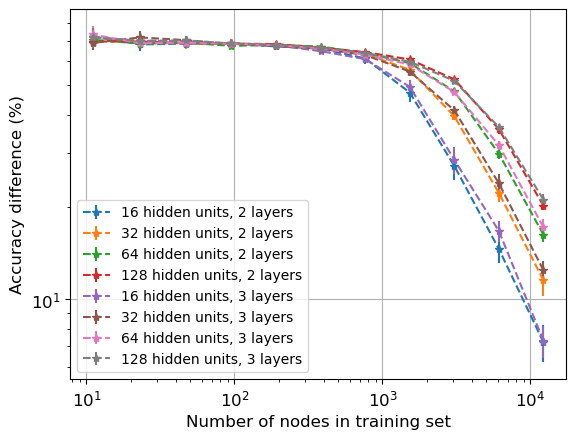

<Figure size 640x480 with 0 Axes>

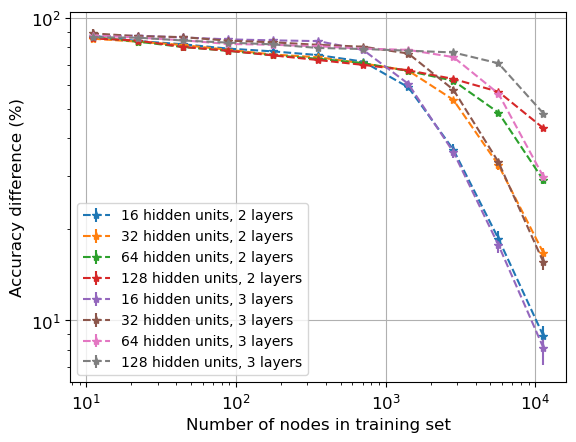

<Figure size 640x480 with 0 Axes>

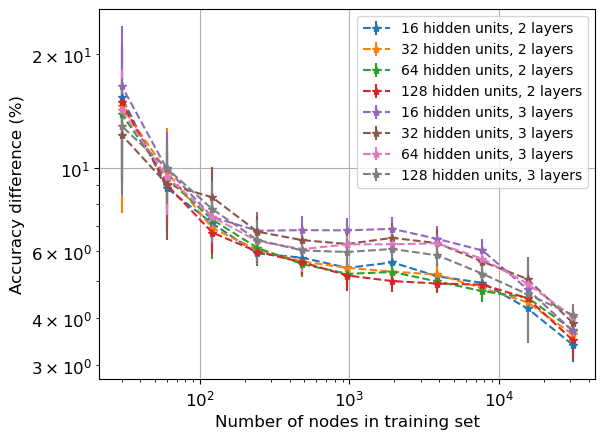

<Figure size 640x480 with 0 Axes>

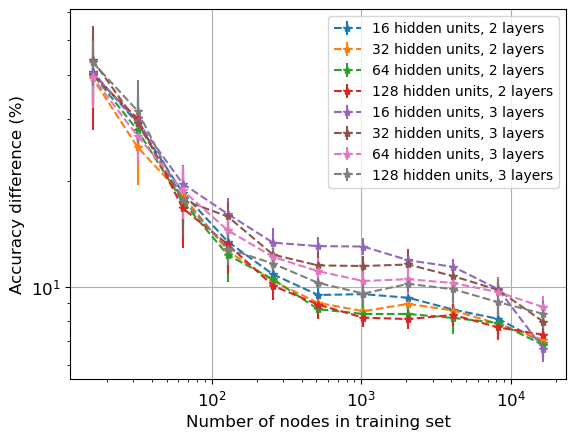

<Figure size 640x480 with 0 Axes>

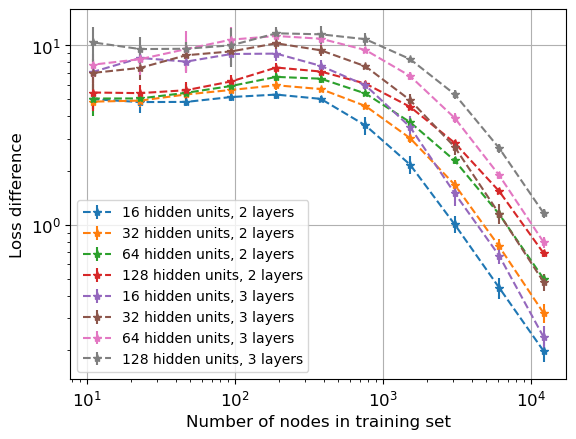

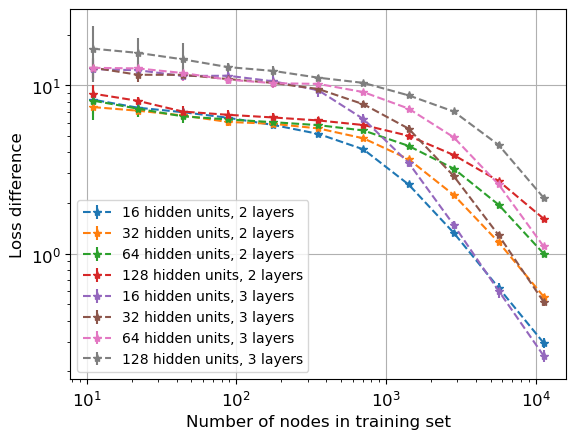

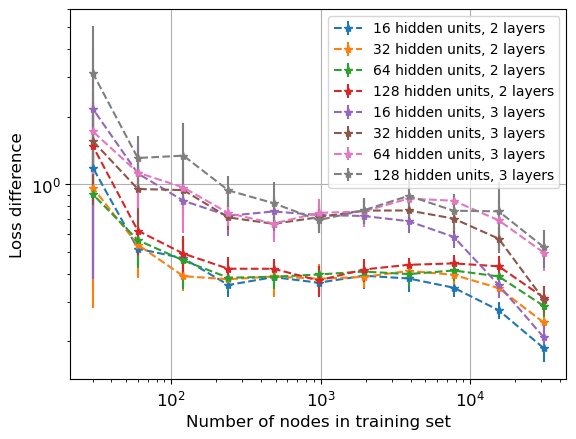

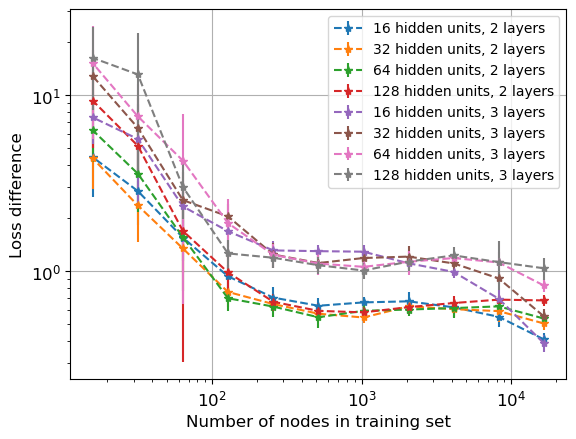

In [7]:
# LOG ON THE NODES

cols = ['Test Loss', 'Train Loss', 'Test Accuracy', 'Train Accuracy','Difference Accuracy', 'Difference Loss']
unique_values = df['nodes'].unique()
nodes = unique_values[::-1]

val = 12
plt.rcParams.update({
    'font.size': val,            # General font size
    'axes.titlesize': val,       # Axes title font size
    'axes.labelsize': val,       # Axes labels font size
    'xtick.labelsize': val,      # X-tick labels font size
    'ytick.labelsize': val,      # Y-tick labels font size
    'legend.fontsize': 10,      # Legend font size
    'figure.titlesize': val      # Figure title font size
})
# fig, ax = plt.subplots()
legend = []

# hiddens = [8,16,32,64]
# layers = [2,3]

hiddens = [16,32,64,128]
layers = [2,3]

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
print(len(colors))
npoints = -1
color_count = 0
for dataset in datasets:
    color_count = 0
    fig, ax = plt.subplots()
    for layer in layers:
        for hidden in hiddens:
            nodes = np.array([])

            means = {key: [] for key in cols}
            stds  = {key: [] for key in cols}               

            for partition in partitions:
                for col in cols:

                    condition = (df['partitions'] == partition) & (df['hiddens'] == hidden) & (df['layers'] == layer) & (df['dataset'] == dataset)
                    filtered_df = df[condition]
                    nodes = np.append(nodes, filtered_df['nodes'])
                    means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[0]]
                    stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[1]]
            # print(color_count)
            # print(nodes, means['Difference Accuracy'], stds['Difference Accuracy'])
            nodes = np.unique(nodes)[::-1]

            ax.errorbar(nodes,  np.abs(np.array(means['Difference Accuracy'])), yerr=stds['Difference Accuracy'], fmt= '--*', color=colors[color_count])
            color_count = color_count + 1
            legend = legend + [f'{hidden} hidden units, {layer} layers']
    ax.legend(legend) 
    plt.grid(True)

    plt.yscale('log')  # Set x-axis to logarithmic scale
    plt.xscale('log')  # Set x-axis to logarithmic scale

    plt.xlabel('Number of nodes in training set')
    plt.ylabel('Accuracy difference (%)')
    plt.savefig(f'acc_diff_{dataset}.pdf')
    plt.figure()
# fig, ax = plt.subplots()


for dataset in datasets:
    color_count = 0
    fig, ax = plt.subplots()
    legend = []
    color_count = 0
    for layer in layers:
        for hidden in hiddens:
            nodes = np.array([])

            means = {key: [] for key in cols}
            stds  = {key: [] for key in cols}
            for partition in partitions:
                for col in cols:
                    condition = (df['partitions'] == partition) & (df['hiddens'] == hidden) & (df['layers'] == layer) & (df['dataset'] == dataset)
                    filtered_df = df[condition]
                    nodes = np.append(nodes, filtered_df['nodes'])

                    means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[0]]
                    stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[1]]
            nodes = np.unique(nodes)[::-1]

            ax.errorbar(nodes,  np.abs(means['Difference Loss']), yerr=stds['Difference Loss'], fmt= '--*', color=colors[color_count])
            # ax.errorbar(nodes,  means['Difference Loss'], yerr=stds['Difference Loss'], fmt= '--*', color=colors[color_count])

            color_count = color_count + 1
            legend = legend + [f'{hidden} hidden units, {layer} layers']
    ax.legend(legend) 
    plt.grid(True)
    plt.yscale('log')  # Set x-axis to logarithmic scale
    plt.xscale('log')  # Set x-axis to logarithmic scale

    plt.xlabel('Number of nodes in training set')
    plt.ylabel('Loss difference')
    plt.savefig(f'loss_diff_{dataset}.pdf')

10
Amazon

Accuracy & $2$ & $32$  & $-7.693e-01$ & $4.236e+00$  & $-9.914e-01$  \\ \hline
Accuracy & $2$ & $64$  & $-7.788e-01$ & $4.404e+00$  & $-9.972e-01$  \\ \hline
Accuracy & $3$ & $32$  & $-7.268e-01$ & $4.101e+00$  & $-9.868e-01$  \\ \hline
Accuracy & $3$ & $64$  & $-7.345e-01$ & $4.253e+00$  & $-9.924e-01$  \\ \hline
Roman

Accuracy & $2$ & $32$  & $-8.408e-01$ & $4.644e+00$  & $-9.963e-01$  \\ \hline
Accuracy & $2$ & $64$  & $-7.435e-01$ & $4.477e+00$  & $-1.000e+00$  \\ \hline
Accuracy & $3$ & $32$  & $-9.476e-01$ & $5.049e+00$  & $-9.956e-01$  \\ \hline
Accuracy & $3$ & $64$  & $-9.145e-01$ & $5.182e+00$  & $-1.000e+00$  \\ \hline
Physics

Accuracy & $2$ & $32$  & $-1.524e-01$ & $1.235e+00$  & $-9.064e-01$  \\ \hline
Accuracy & $2$ & $64$  & $-1.478e-01$ & $1.218e+00$  & $-9.145e-01$  \\ \hline
Accuracy & $3$ & $32$  & $-1.227e-01$ & $1.190e+00$  & $-9.328e-01$  \\ \hline
Accuracy & $3$ & $64$  & $-1.268e-01$ & $1.200e+00$  & $-8.826e-01$  \\ \hline
CS

Accuracy & $2$ & $32$

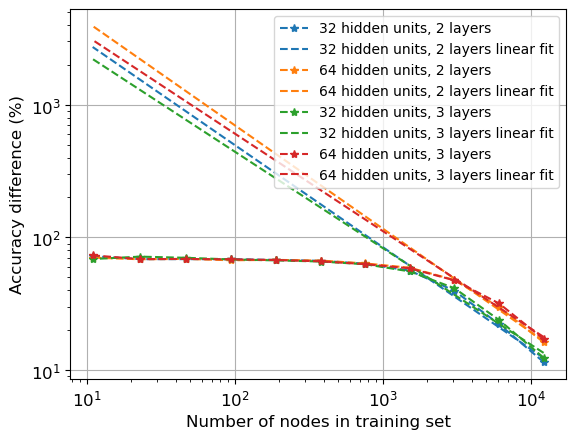

<Figure size 640x480 with 0 Axes>

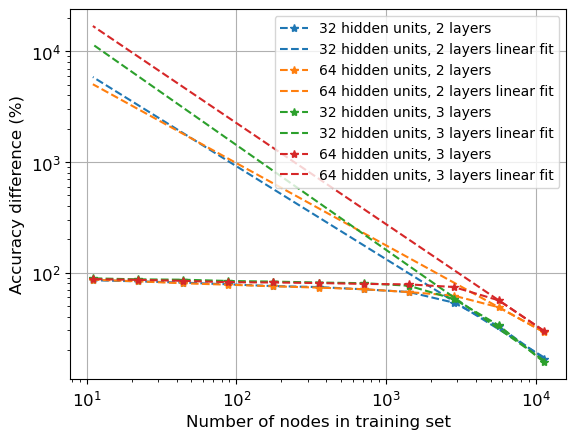

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

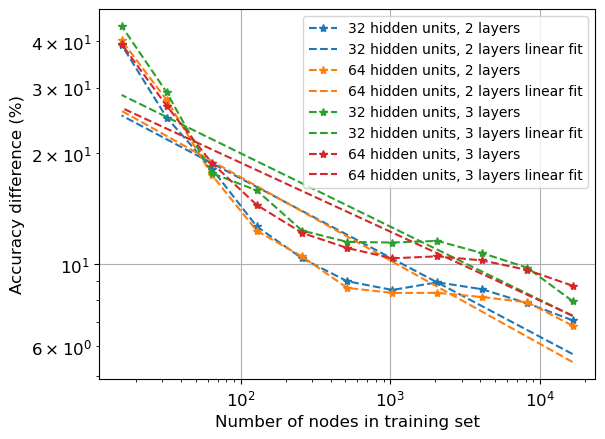

<Figure size 640x480 with 0 Axes>

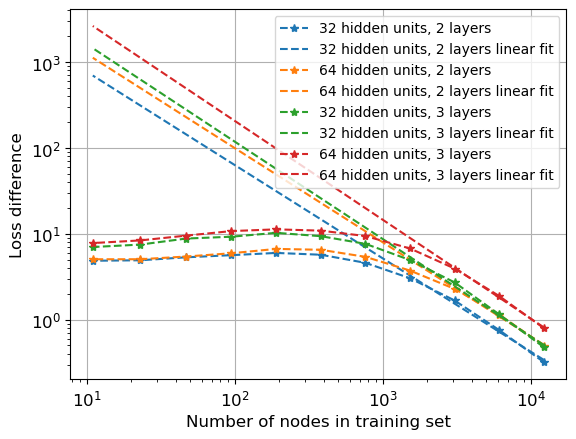

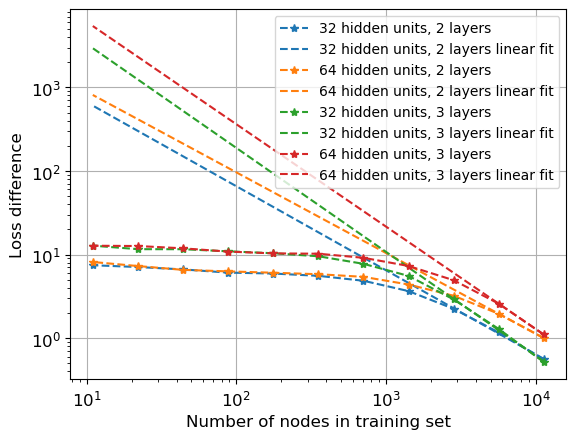

In [8]:
# Linear Fits
import scipy
def estimate_coefficients(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    
    a = numerator / denominator
    b = y_mean - a * x_mean
    r, prob = scipy.stats.pearsonr(x, y)

    return a, b, r, prob


val = 12
plt.rcParams.update({
    'font.size': val,            # General font size
    'axes.titlesize': val,       # Axes title font size
    'axes.labelsize': val,       # Axes labels font size
    'xtick.labelsize': val,      # X-tick labels font size
    'ytick.labelsize': val,      # Y-tick labels font size
    'legend.fontsize': 10,      # Legend font size
    'figure.titlesize': val      # Figure title font size
})

cols = ['Test Loss', 'Train Loss', 'Test Accuracy', 'Train Accuracy','Difference Accuracy', 'Difference Loss','Difference Accuracy Abs', 'Difference Loss Abs']
unique_values = df['nodes'].unique()
nodes = unique_values[::-1]
# fig, ax = plt.subplots()
legend = []

# hiddens = [8,16,32,64]
# layers = [2,3]

hiddens = [32,64]
layers = [2,3]

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
print(len(colors))
npoints = -1
color_count = 0
for dataset in datasets:

    print(dataset+'\n')
    color_count = 0
    fig, ax = plt.subplots()
    for layer in layers:
        for hidden in hiddens:
            nodes = np.array([])

            means = {key: [] for key in cols}
            stds  = {key: [] for key in cols}               

            for partition in partitions:
                for col in cols:

                    condition = (df['partitions'] == partition) & (df['hiddens'] == hidden) & (df['layers'] == layer) & (df['dataset'] == dataset)
                    filtered_df = df[condition]
                    nodes = np.append(nodes, filtered_df['nodes'])
                    means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[0]]
                    stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[1]]
            # print(color_count)
            # print(nodes, means['Difference Accuracy'], stds['Difference Accuracy'])
            nodes = np.unique(nodes)[::-1]
            if dataset in [ 'Amazon']:
                vec = np.where(np.array(means['Train Accuracy']) < 95)
            elif dataset in [ 'Roman']:
                vec = np.where(np.array(means['Train Accuracy']) < 95)
            else:
                vec = np.where(np.array(means['Train Accuracy']) < 101)
            a, b, r, p = estimate_coefficients(np.log10(nodes[vec]), np.log10(np.array(means['Difference Accuracy Abs'])[vec]))
            # print(a,b,vec)
            ax.plot(nodes,  np.abs(np.array(means['Difference Accuracy'])),  '--*', color=colors[color_count])
            ax.plot(nodes, 10**(a*np.log10(nodes)+b), '--',color=colors[color_count])
            print(f"Accuracy & ${layer}$ & ${hidden}$  & ${a:.3e}$ & ${b:.3e}$  & ${r:.3e}$  \\\\ \\hline")

            color_count = color_count + 1
            legend = legend + [f'{hidden} hidden units, {layer} layers']
            legend = legend + [f'{hidden} hidden units, {layer} layers linear fit']

    ax.legend(legend) 
    plt.grid(True)

    plt.yscale('log')  # Set x-axis to logarithmic scale
    plt.xscale('log')  # Set x-axis to logarithmic scale

    plt.xlabel('Number of nodes in training set')
    plt.ylabel('Accuracy difference (%)')
    plt.savefig(f'acc_lin_fit_{dataset}.pdf')
    plt.figure()
# fig, ax = plt.subplots()


for dataset in datasets:
    print(dataset+'\n')

    color_count = 0
    fig, ax = plt.subplots()
    legend = []
    color_count = 0
    for layer in layers:
        for hidden in hiddens:
            nodes = np.array([])

            means = {key: [] for key in cols}
            stds  = {key: [] for key in cols}
            for partition in partitions:
                for col in cols:
                    condition = (df['partitions'] == partition) & (df['hiddens'] == hidden) & (df['layers'] == layer) & (df['dataset'] == dataset)
                    filtered_df = df[condition]
                    nodes = np.append(nodes, filtered_df['nodes'])

                    means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[0]]
                    stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[1]]
            nodes = np.unique(nodes)[::-1]

            if dataset in [ 'Amazon']:
                vec = np.where(np.array(means['Train Accuracy']) < 95)
                # print(np.array(means['Train Accuracy']))
                # print(dataset, vec)
            elif dataset in [ 'Roman']:
                vec = np.where(np.array(means['Train Accuracy']) < 95)
            else:
                vec = np.where(np.array(means['Train Accuracy']) < 101)
            # print(dataset, vec)
            a, b, r, p  = estimate_coefficients(np.log10(nodes[vec]), np.log10(np.array(means['Difference Loss Abs'])[vec]))

            print(f"Loss & ${layer}$ & ${hidden}$  & ${a:.3e}$ & ${b:.3e}$  & ${r:.3e}$  \\\\ \\hline")

            ax.plot(nodes,  np.abs(means['Difference Loss']), '--*', color=colors[color_count])
            # ax.errorbar(nodes,  means['Difference Loss'], yerr=stds['Difference Loss'], fmt= '--*', color=colors[color_count])
            ax.plot(nodes, 10**(a*np.log10(nodes)+b), '--',color=colors[color_count])

            color_count = color_count + 1
            legend = legend + [f'{hidden} hidden units, {layer} layers']
            legend = legend + [f'{hidden} hidden units, {layer} layers linear fit']

    ax.legend(legend) 
    plt.grid(True)
    plt.yscale('log')  # Set x-axis to logarithmic scale
    plt.xscale('log')  # Set x-axis to logarithmic scale

    plt.xlabel('Number of nodes in training set')
    plt.ylabel('Loss difference')
    plt.savefig(f'loss_lin_fit_{dataset}.pdf')

10
Amazon

Accuracy & $2$ & $32$  & $-7.693e-01$ & $4.236e+00$  & $-9.914e-01$  \\ \hline
Accuracy & $2$ & $64$  & $-7.788e-01$ & $4.404e+00$  & $-9.972e-01$  \\ \hline
Accuracy & $3$ & $32$  & $-7.268e-01$ & $4.101e+00$  & $-9.868e-01$  \\ \hline
Accuracy & $3$ & $64$  & $-7.345e-01$ & $4.253e+00$  & $-9.924e-01$  \\ \hline
Roman

Accuracy & $2$ & $32$  & $-8.408e-01$ & $4.644e+00$  & $-9.963e-01$  \\ \hline
Accuracy & $2$ & $64$  & $-7.435e-01$ & $4.477e+00$  & $-1.000e+00$  \\ \hline
Accuracy & $3$ & $32$  & $-9.476e-01$ & $5.049e+00$  & $-9.956e-01$  \\ \hline
Accuracy & $3$ & $64$  & $-9.145e-01$ & $5.182e+00$  & $-1.000e+00$  \\ \hline
Physics

Accuracy & $2$ & $32$  & $-1.524e-01$ & $1.235e+00$  & $-9.064e-01$  \\ \hline
Accuracy & $2$ & $64$  & $-1.478e-01$ & $1.218e+00$  & $-9.145e-01$  \\ \hline
Accuracy & $3$ & $32$  & $-1.227e-01$ & $1.190e+00$  & $-9.328e-01$  \\ \hline
Accuracy & $3$ & $64$  & $-1.268e-01$ & $1.200e+00$  & $-8.826e-01$  \\ \hline
CS

Accuracy & $2$ & $32$

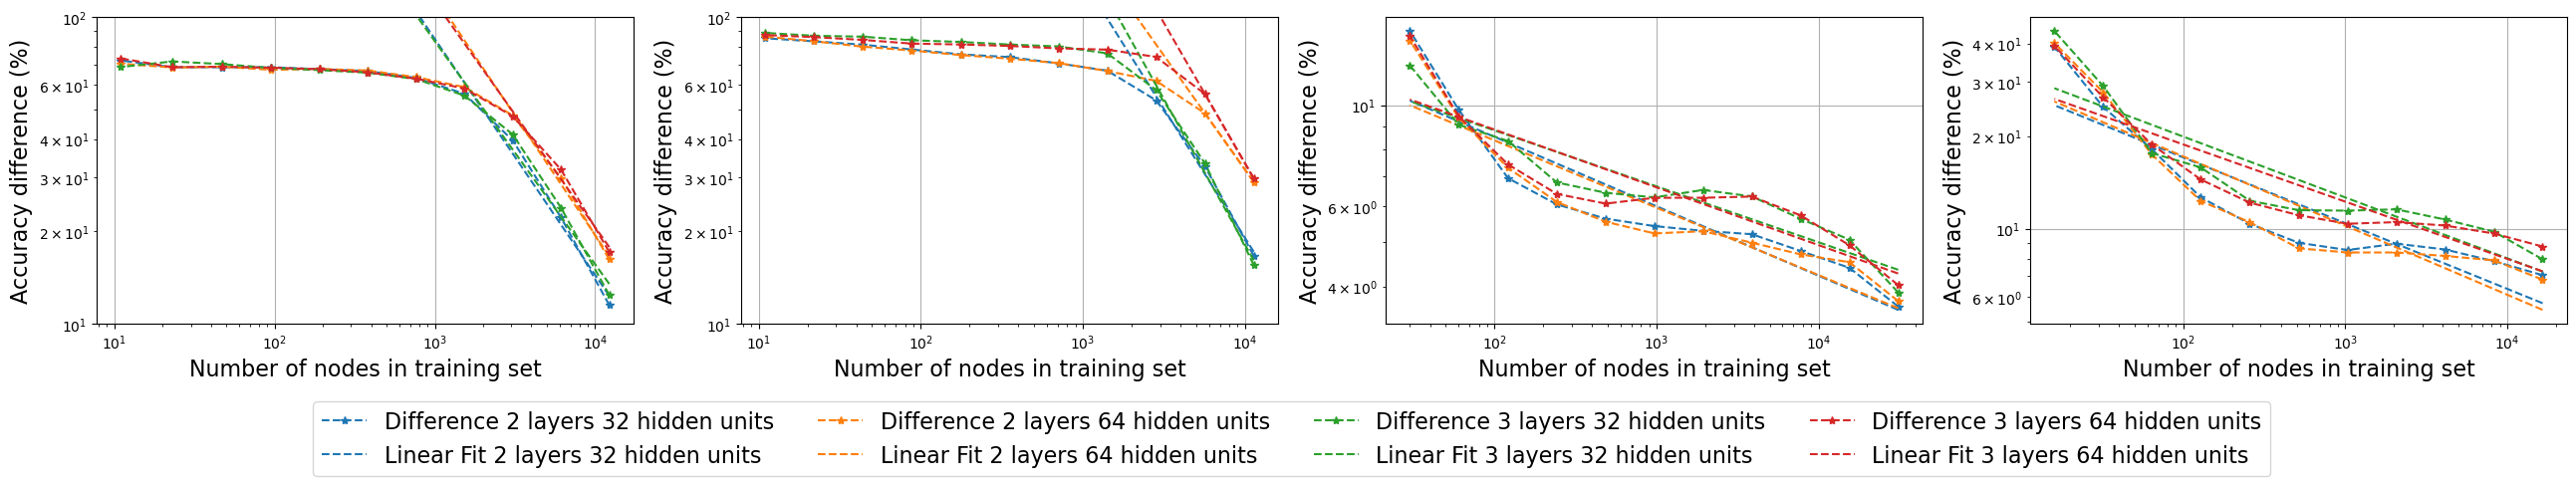

In [17]:
# Linear Fits Same Plot
import scipy

val = 12
plt.rcParams.update({
    'font.size': val,            # General font size
    'axes.titlesize': val,       # Axes title font size
    'axes.labelsize': val,       # Axes labels font size
    'xtick.labelsize': val,      # X-tick labels font size
    'ytick.labelsize': val,      # Y-tick labels font size
    'legend.fontsize': 10,      # Legend font size
    'figure.titlesize': val      # Figure title font size
})

def estimate_coefficients(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    
    a = numerator / denominator
    b = y_mean - a * x_mean
    r, prob = scipy.stats.pearsonr(x, y)

    return a, b, r, prob
cols = ['Test Loss', 'Train Loss', 'Test Accuracy', 'Train Accuracy','Difference Accuracy', 'Difference Loss','Difference Accuracy Abs', 'Difference Loss Abs']
unique_values = df['nodes'].unique()
nodes = unique_values[::-1]
# fig, ax = plt.subplots()
legend = []

# hiddens = [8,16,32,64]
# layers = [2,3]
fontsize_val = 16
hiddens = [32,64]
layers = [2,3]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(32, 4))#, figaspect=aspect_ratio)
legend_lines = []
legend_labels = []

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
print(len(colors))
npoints = -1
color_count = 0
for i, dataset in enumerate(datasets):

    print(dataset+'\n')
    color_count = 0
    # fig, ax = plt.subplots()
    for layer in layers:
        for hidden in hiddens:
            nodes = np.array([])

            means = {key: [] for key in cols}
            stds  = {key: [] for key in cols}               

            for partition in partitions:
                for col in cols:

                    condition = (df['partitions'] == partition) & (df['hiddens'] == hidden) & (df['layers'] == layer) & (df['dataset'] == dataset)
                    filtered_df = df[condition]
                    nodes = np.append(nodes, filtered_df['nodes'])
                    means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[0]]
                    stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[1]]
            # print(color_count)
            # print(nodes, means['Difference Accuracy'], stds['Difference Accuracy'])
            nodes = np.unique(nodes)[::-1]
            if dataset in [ 'Amazon']:
                vec = np.where(np.array(means['Train Accuracy']) < 95)
            elif dataset in [ 'Roman']:
                vec = np.where(np.array(means['Train Accuracy']) < 95)
            else:
                vec = np.where(np.array(means['Train Accuracy']) < 101)
            a, b, r, p = estimate_coefficients(np.log10(nodes[vec]), np.log10(np.array(means['Difference Accuracy Abs'])[vec]))
            # print(a,b,vec)
            train_acc_line = axes[i].plot(nodes,  np.abs(np.array(means['Difference Accuracy'])),  '--*', color=colors[color_count], label=f'Difference {layer} layers {hidden} hidden units')
            test_acc_line = axes[i].plot(nodes, 10**(a*np.log10(nodes)+b), '--',color=colors[color_count], label=f'Linear Fit {layer} layers {hidden} hidden units')
            print(f"Accuracy & ${layer}$ & ${hidden}$  & ${a:.3e}$ & ${b:.3e}$  & ${r:.3e}$  \\\\ \\hline")

            color_count = color_count + 1
            legend = legend + [f'{hidden} hidden units, {layer} layers']
            legend = legend + [f'{hidden} hidden units, {layer} layers linear fit']

            axes[i].grid(True)
            axes[i].set_xscale('log')  # Set x-axis to logarithmic scale
            axes[i].set_yscale('log')  # Set x-axis to logarithmic scale
            axes[i].set_xlabel('Number of nodes in training set', fontsize=fontsize_val)
            axes[i].set_ylabel('Accuracy difference (%)', fontsize=fontsize_val)
            if i == 0 :

                legend_lines.append(train_acc_line[0])
                legend_lines.append(test_acc_line[0])
                legend_labels.append(f'Difference {layer} layers {hidden} hidden units')
                legend_labels.append(f'Linear Fit {layer} layers {hidden} hidden units')
            if i in [0,1]:
                axes[i].set_ylim(10, 100)  # Set x-axis to logarithmic scale
    # ax.legend(legend, fontsize='xx-small') 
    plt.grid(True)

    # plt.yscale('log')  # Set x-axis to logarithmic scale
    # plt.xscale('log')  # Set x-axis to logarithmic scale

    # plt.xlabel('Number of nodes in training set')
    # plt.ylabel('Accuracy difference (%)')
    # plt.savefig(f'acc_lin_fit_{dataset}.pdf')
    # plt.figure()
# fig, ax = plt.subplots()
fig.legend(legend_lines, legend_labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.3), frameon=True, fontsize=fontsize_val)

plt.savefig(f'horizontal_Amazon_Roman_Physics_CS_lin_fit.pdf', bbox_inches='tight')

10


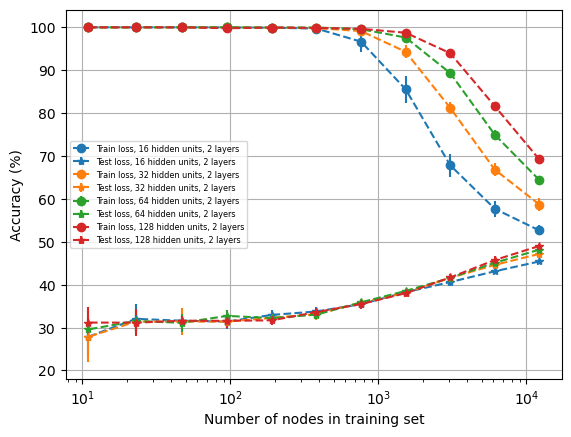

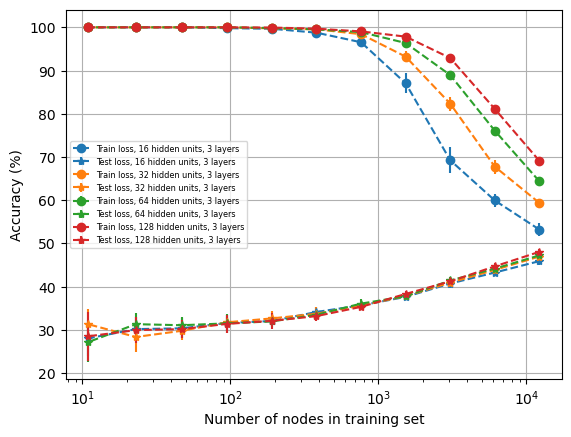

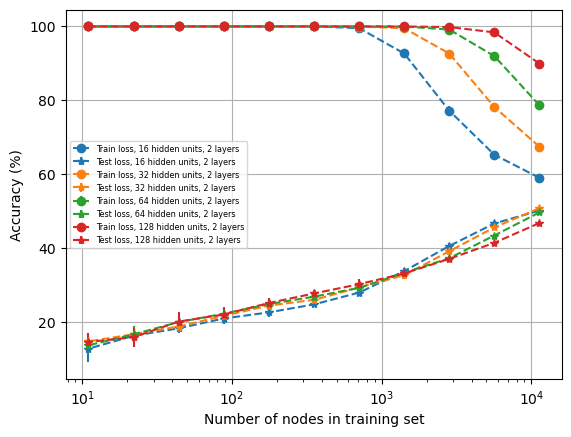

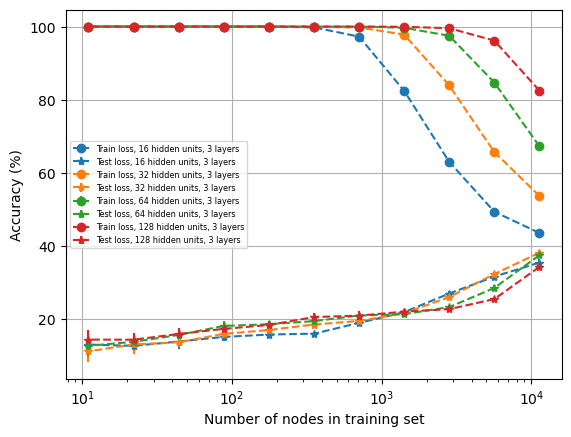

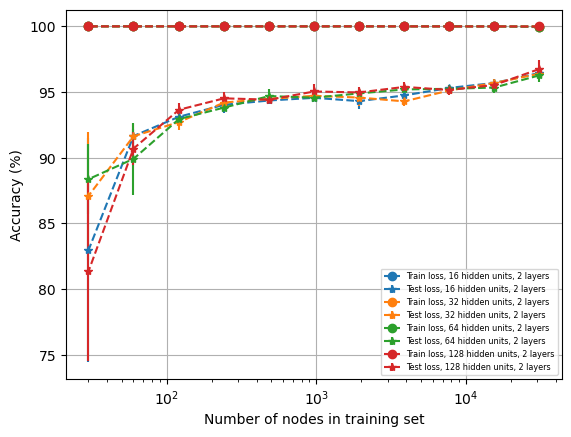

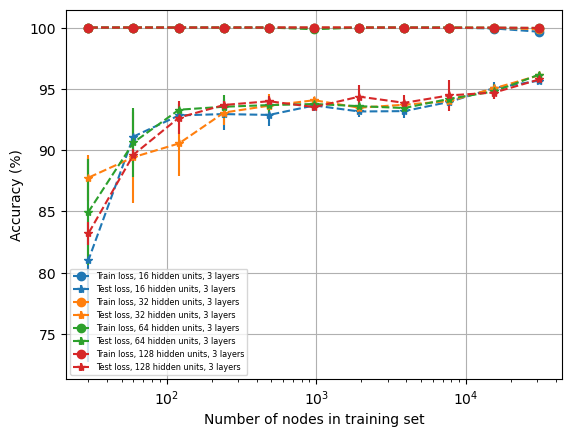

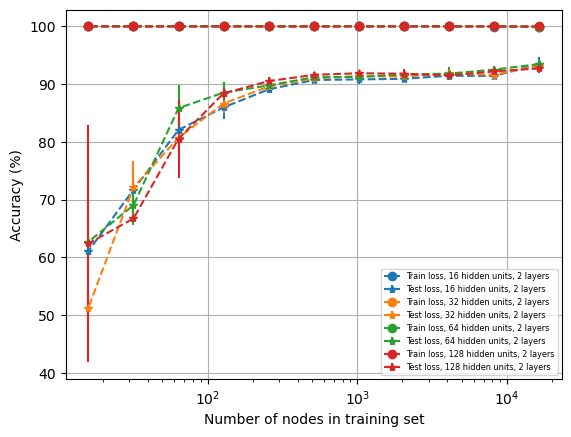

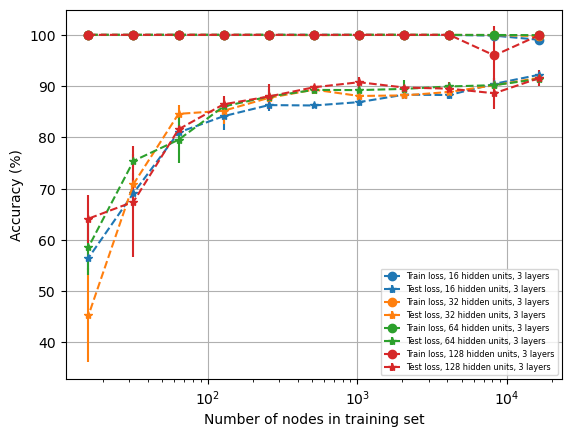

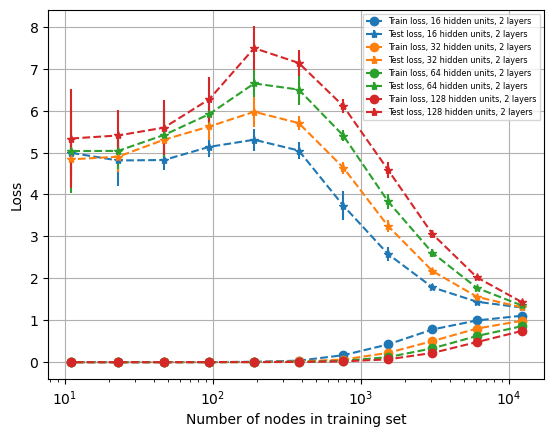

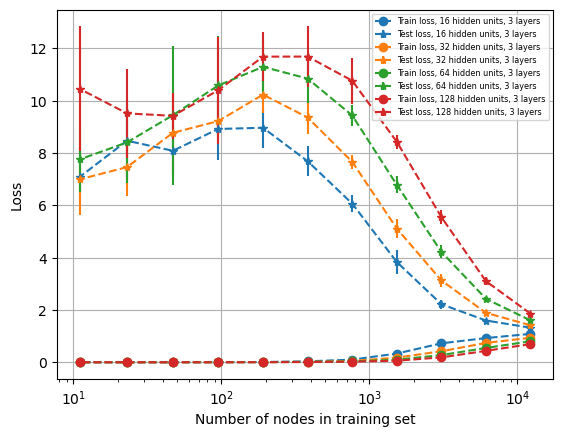

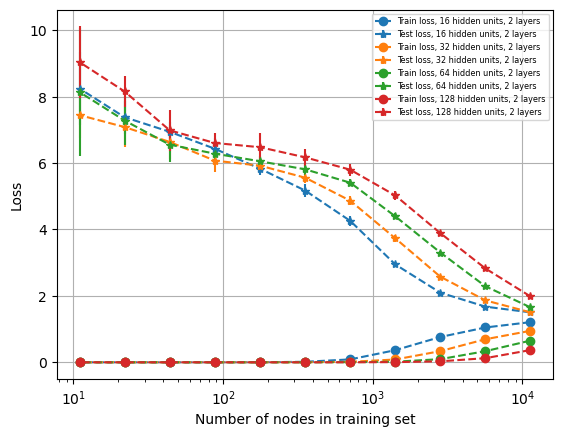

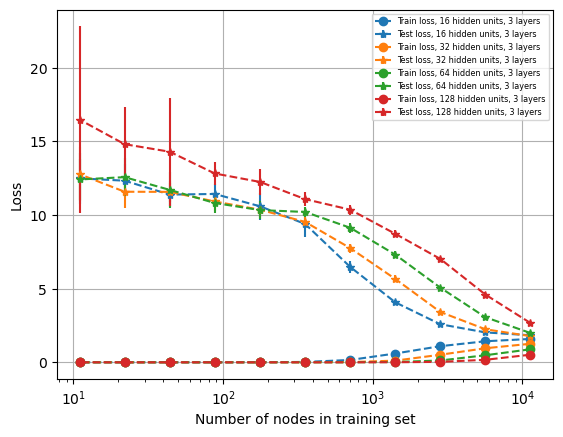

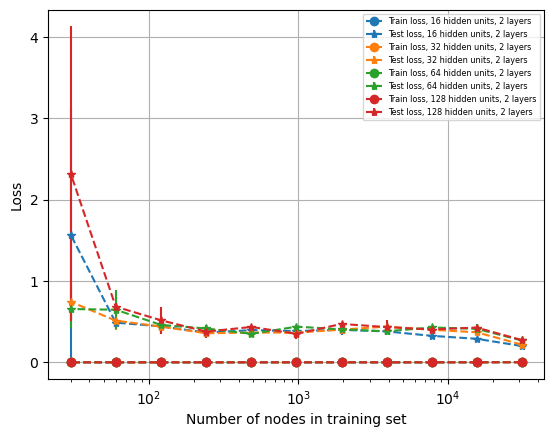

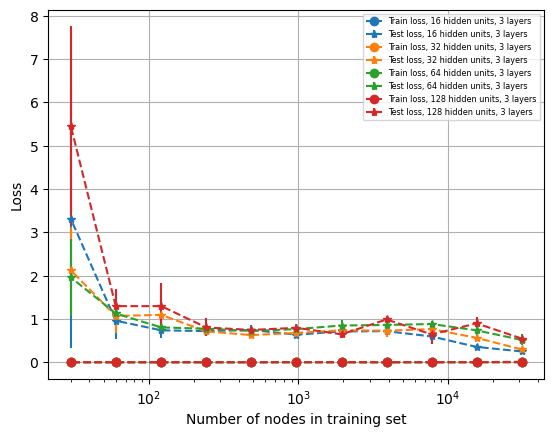

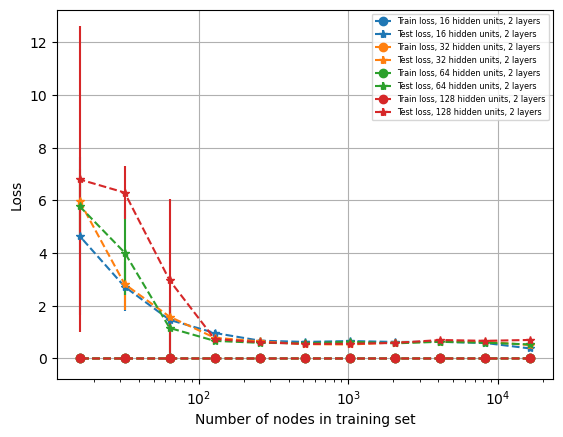

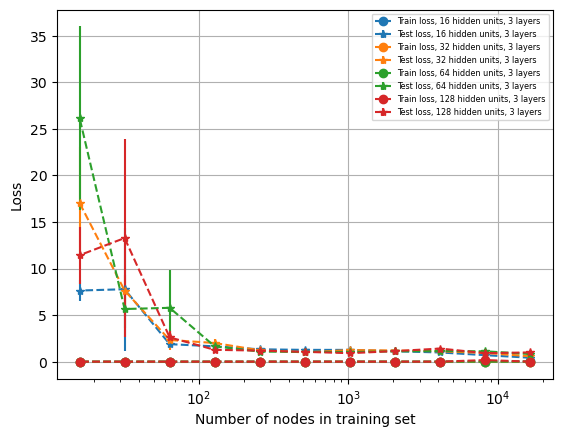

In [3]:
# Plot 3 and 4
# hiddens = [8,16,32,64]
# layers = [2,3]

# partitions = {'Cora':[1, 2, 4, 8, 16, 32, 64, 128],
#               'CiteSeer':[1, 2, 4, 8, 16, 32, 64],
#               'PubMed':[1, 2, 4, 8, 16, 32]}

cols = ['Test Loss', 'Train Loss', 'Test Accuracy', 'Train Accuracy','Difference Accuracy', 'Difference Loss']
unique_values = df['nodes'].unique()


val = 12
plt.rcParams.update({
    'font.size': val,            # General font size
    'axes.titlesize': val,       # Axes title font size
    'axes.labelsize': val,       # Axes labels font size
    'xtick.labelsize': val,      # X-tick labels font size
    'ytick.labelsize': val,      # Y-tick labels font size
    'legend.fontsize': 10,      # Legend font size
    'figure.titlesize': val      # Figure title font size
})

nodes = unique_values[::-1]
# fig, ax = plt.subplots()
legend = []
color_count = 0

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
print(len(colors))

for dataset in datasets:

    for layer in layers:
        color_count = 0
        legend = []
        color_count = 0
        fig, ax = plt.subplots()
        for hidden in hiddens:
            nodes = np.array([])

            means = {key: [] for key in cols}
            stds  = {key: [] for key in cols}               

            for partition in partitions:
                for col in cols:
                    condition = (df['partitions'] == partition) & (df['hiddens'] == hidden) & (df['layers'] == layer) & (df['dataset'] == dataset)
                    filtered_df = df[condition]
                    nodes = np.append(nodes, filtered_df['nodes'])
                    means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[0]]
                    stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[1]]
                    if dataset == 'Physics' and layer == 3 and hidden == 256:
                        print('Values this run',filtered_df[filtered_df['nodes'] == 970]['Train Accuracy'])
            nodes = np.unique(nodes)[::-1]

            if dataset == 'Physics' and layer == 3 and hidden == 256:
                print('Values', nodes, np.array(means['Train Accuracy']), np.array(stds['Train Accuracy']))

            ax.errorbar(nodes,  np.array(means['Train Accuracy']), yerr=stds['Train Accuracy'], fmt= '--o', color=colors[color_count])
            ax.errorbar(nodes,  np.array(means['Test Accuracy']), yerr=stds['Test Accuracy'], fmt= '--*', color=colors[color_count])
            color_count = color_count + 1
            if layer ==1:
                legend = legend + [f'Train loss, {hidden} hidden units, {layer} layer']
                legend = legend + [f'Test loss, {hidden} hidden units, {layer} layer']
            else:
                legend = legend + [f'Train loss, {hidden} hidden units, {layer} layers']
                legend = legend + [f'Test loss, {hidden} hidden units, {layer} layers']
        ax.legend(legend) 
        plt.grid(True)

        plt.xscale('log')  # Set x-axis to logarithmic scale
        plt.xlabel('Number of nodes in training set')
        plt.ylabel('Accuracy (%)')
        # plt.title(f'Accuracy {dataset} {layer}' )

        plt.savefig(f'acc_layer_{layer}_{dataset}.pdf')
        # fig, ax = plt.subplots()

legend = []
color_count = 0

for dataset in datasets:

    for layer in layers:
        color_count = 0
        legend = []
        color_count = 0
        fig, ax = plt.subplots()
        for hidden in hiddens:
            nodes = np.array([])

            means = {key: [] for key in cols}
            stds  = {key: [] for key in cols}
            for partition in partitions:
                for col in cols:

                    condition = (df['partitions'] == partition) & (df['hiddens'] == hidden) & (df['layers'] == layer) & (df['dataset'] == dataset)
                    filtered_df = df[condition]
                    nodes = np.append(nodes, filtered_df['nodes'])
                    means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[0]]
                    stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col, dataset)[1]]
            nodes = np.unique(nodes)[::-1]
            ax.errorbar(nodes,  np.array(means['Train Loss']), yerr=stds['Train Loss'], fmt= '--o', color=colors[color_count])
            ax.errorbar(nodes,  np.array(means['Test Loss']), yerr=stds['Test Loss'], fmt= '--*', color=colors[color_count])
            color_count = color_count + 1
            if layer ==1:
                legend = legend + [f'Train loss, {hidden} hidden units, {layer} layer']
                legend = legend + [f'Test loss, {hidden} hidden units, {layer} layer']
            else:
                legend = legend + [f'Train loss, {hidden} hidden units, {layer} layers']
                legend = legend + [f'Test loss, {hidden} hidden units, {layer} layers']



        ax.legend(legend) 
        plt.grid(True)
        plt.xscale('log')  # Set x-axis to logarithmic scale
        plt.xlabel('Number of nodes in training set')
        plt.ylabel('Loss')
        # plt.title(f'Loss {dataset} {layer}' )
        plt.savefig(f'loss_layer_{layer}_{dataset}.pdf')
    # fig, ax = plt.subplots()


In [9]:
# Compute the person correlations
import scipy
import warnings
warnings.filterwarnings('ignore')

hiddens = [64, 128, 256,512]
layers = [1, 2, 3, 4]

cols = ['Test Loss', 'Train Loss', 'Test Accuracy', 'Train Accuracy','Difference Accuracy', 'Difference Loss']
unique_values = df['nodes'].unique()
nodes = unique_values[::-1]


prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

color_count = 0
for layer in layers:
    for hidden in hiddens:
        means = {key: [] for key in cols}
        stds  = {key: [] for key in cols}               

        for partition in partitions:
            for col in cols:
                means[col] = means[col] + [get_mean_std(df, partition, hidden, layer, col)[0]]
                stds[col] = stds[col] + [get_mean_std(df, partition, hidden, layer, col)[1]]
        r_acc, prob_acc = scipy.stats.pearsonr(nodes, means['Difference Accuracy'])
        r_loss, prob_loss = scipy.stats.pearsonr(nodes, means['Difference Loss'])

        # print(f"${layer}$ & ${hidden}$  & ${round(r,3)}$  & ${round(prob,4)}$ \\\\ \hline")
        r_acc= "{:.3f}".format(r_acc)
        prob_acc= "{:.3f}".format(prob_acc)
        r_loss= "{:.3f}".format(r_loss)
        prob_loss= "{:.3f}".format(prob_loss)
        print(f"${layer}$ & ${hidden}$  & ${r_acc}/{r_loss}$  & ${prob_acc}/{prob_loss}$ \\\\ \hline")


$1$ & $64$  & $0.530/-0.501$  & $0.094/0.116$ \\ \hline
$1$ & $128$  & $0.531/-0.503$  & $0.093/0.115$ \\ \hline
$1$ & $256$  & $0.543/-0.509$  & $0.085/0.110$ \\ \hline
$1$ & $512$  & $0.529/-0.499$  & $0.094/0.118$ \\ \hline
$2$ & $64$  & $0.717/-0.697$  & $0.013/0.017$ \\ \hline
$2$ & $128$  & $0.772/-0.755$  & $0.005/0.007$ \\ \hline
$2$ & $256$  & $0.820/-0.806$  & $0.002/0.003$ \\ \hline
$2$ & $512$  & $0.850/-0.839$  & $0.001/0.001$ \\ \hline
$3$ & $64$  & $0.715/-0.700$  & $0.013/0.016$ \\ \hline
$3$ & $128$  & $0.778/-0.768$  & $0.005/0.006$ \\ \hline
$3$ & $256$  & $0.826/-0.826$  & $0.002/0.002$ \\ \hline
$3$ & $512$  & $0.861/-0.864$  & $0.001/0.001$ \\ \hline
$4$ & $64$  & $0.703/-0.693$  & $0.016/0.018$ \\ \hline
$4$ & $128$  & $0.774/-0.764$  & $0.005/0.006$ \\ \hline
$4$ & $256$  & $0.844/-0.841$  & $0.001/0.001$ \\ \hline
$4$ & $512$  & $0.873/-0.875$  & $0.000/0.000$ \\ \hline
